# Explore IGRA soundings (historical balloon data archives) 

## Data interpolated to 25mb levels

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
ds25 = xr.open_dataset('C:/Users/34555/Box/MPO624_data/Ballons_Interpolated_AllLevelsObstimes.derived.25mb.INM00043003_BOMBAY.nc')
ds25

<xarray.Dataset>
Dimensions:       (lev: 42, time: 31174, var: 19)
Coordinates:
  * time          (time) float64 1.955e+09 1.955e+09 1.955e+09 1.955e+09 ...
  * lev           (lev) float32 1000.0 975.0 950.0 925.0 900.0 875.0 850.0 ...
  * var           (var) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18
Data variables:
    Data          (time, lev, var) float32 ...
    InterpLevNum  (time) float64 ...
    variables     (var) object ...
    units         (var) object ...
    release_time  (time) float64 ...
    PW            (time) float32 ...
    InvPress      (time) float32 ...
    InvHgt        (time) float32 ...
    InvTmpDif     (time) float32 ...
    MixPres       (time) float32 ...
    MixHgt        (time) float32 ...
    FrzPress      (time) float32 ...
    FrzHgt        (time) float32 ...
    LCLPres       (time) float32 ...
    LCLHgt        (time) float32 ...
    LFCPress      (time) float32 ...
    LFCHgt        (time) float32 ...
    LNBPress      (time) float32 ...

array(['1955011715', '1955020615', '1955021715', ..., '2019081212',
       '2019081300', '2019081312'],
      dtype='<U21')

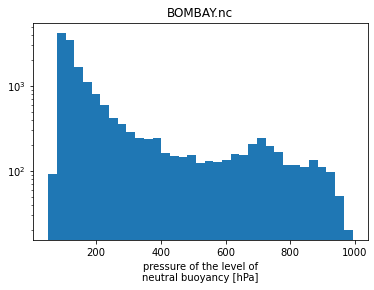

In [12]:
ds25.LNBPress.plot.hist(bins=35, log=True)
plt.title(sta)

In [259]:
# Create year, month, day, hour time lists for subsetting
# Get the date as a string from an integer, not a float number
date = ds25.time.values.astype('int').astype('str')

# print(date[0]) # 1947060715

# Extract characters: Brackets create a list of one element from date[0]
yyyy = [date[0][0:4]]
mm = [date[0][4:6]]
dd = [date[0][6:8]]
hh = [date[0][8:10]]

# Lists are appended for all the other elements of date array 
for i in range(len(date)-1): 
    yyyy.append(date[i+1][0:4])
    mm.append(date[i+1][4:6])
    dd.append(date[i+1][6:8])
    hh.append(date[i+1][8:10])
    
# hh  # a list of strings 

(array([  3.00000000e+00,   1.00000000e+01,   1.70000000e+01,
          4.10000000e+01,   8.40000000e+01,   2.70000000e+02,
          7.25000000e+02,   1.36800000e+03,   2.88700000e+03,
          4.16200000e+03,   5.25900000e+03,   4.90500000e+03,
          3.97900000e+03,   2.82600000e+03,   1.76600000e+03,
          9.45000000e+02,   4.65000000e+02,   2.01000000e+02,
          9.80000000e+01,   3.10000000e+01,   1.60000000e+01,
          6.00000000e+00,   2.00000000e+00]),
 array([ 397.        ,  412.04347826,  427.08695652,  442.13043478,
         457.17391304,  472.2173913 ,  487.26086957,  502.30434783,
         517.34782609,  532.39130435,  547.43478261,  562.47826087,
         577.52173913,  592.56521739,  607.60869565,  622.65217391,
         637.69565217,  652.73913043,  667.7826087 ,  682.82608696,
         697.86956522,  712.91304348,  727.95652174,  743.        ]),
 <a list of 23 Patch objects>)

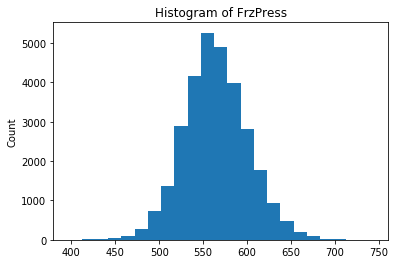

In [38]:
# Freezing level pressure: a histogram
ds25.FrzPress.plot.hist(bins=23)

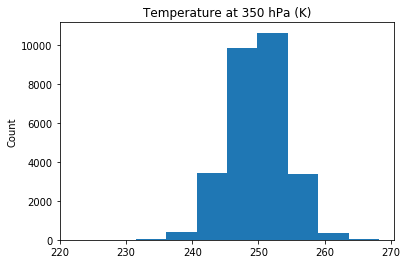

In [24]:
ds25.Data[:,26,3].plot.hist() 
## 3 is "reported temperature", 25 is 350 hPa 
plt.title('Temperature at 350 hPa (K)');

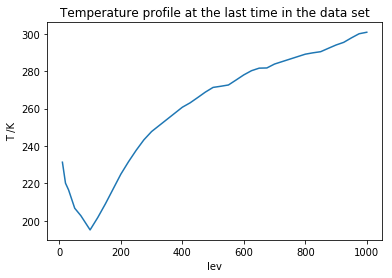

In [33]:
ds25.Data[-1,:,3].plot() 
## 3 is "reported temperature", 25 is 350 hPa 
plt.ylabel('T /K')
plt.title('Temperature profile at the last time in the data set');

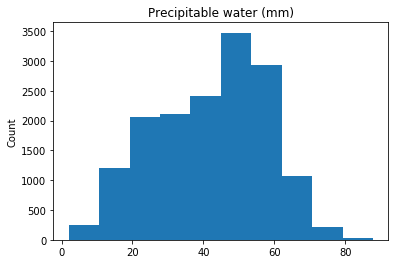

In [25]:
ds25.PW.plot.hist()
plt.title('Precipitable water (mm)');

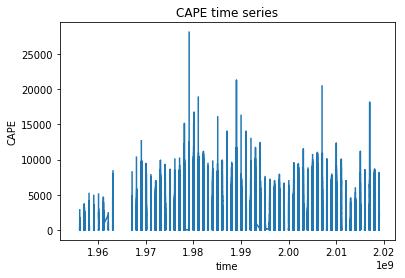

In [27]:
ds25.CAPE.plot()
plt.title('CAPE time series'); # looks like some problematic cases need examining